In [1]:
%pwd

'C:\\Users\\Carlo\\CMPE_209_Group_1_Project'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA



kdd_names_read = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = kdd_names_read.iloc[:,0].values
kdd = pd.read_csv('datasets/kddcup.data_10_percent_corrected.csv', names=kdd_names)
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
kdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [5]:
kdd.loc[:, (kdd != 0).any(axis=0)] # removes column only 0 data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [6]:
missing_values_count = (kdd.isnull().sum()) # Check for missing values

In [7]:
print("Number of missing values within each column:")
print(missing_values_count)

Number of missing values within each column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  

In [9]:
for i in range(len(kdd.columns)):
    if kdd.dtypes[i] == object:
        print(kdd.columns[i],end =": ")
        print(kdd[kdd.columns[i]].unique())

protocol_type: ['tcp' 'udp' 'icmp']
service: ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
flag: ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
attack_type: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [10]:
kdd_binary = kdd.copy()
kdd_binary['attack_type'].values[kdd_binary['attack_type'].values != 'normal.'] = +1
kdd_binary['attack_type'].values[kdd_binary['attack_type'].values == 'normal.'] = 0

kdd_multiclass = kdd.copy()
dos = ['neptune.', 'land.', 'pod.', 'smurf.', 'teardrop.', 'back.', 'worm.', 'udpstorm.', 'processtable.', 'apache2.']
probe = ['ipsweep.','satan.','nmap.','portsweep.','mscan.','saint.']
R2L = ['ftp_write.','guess_passwd.', 'imap.','multihop.','phf.','spy.','warezclient.','warezmaster.','snmpguess.','named.','xlock.','snmpgetattack.','httptunnel.','sendmail.']
U2R = ['buffer_overflow.','loadmodule.','perl.','rootkit.','ps.','xterm.','sqlattack.']

kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(dos)] = 'dos'
kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(probe)] = 'probe'
kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(R2L)] = 'R2L'
kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(U2R)] = 'U2R'

In [11]:
for i in range(len(kdd_binary.columns)):
    if kdd_binary.dtypes[i] == object:
        print(kdd_binary.columns[i],end =": ")
        print(kdd_binary[kdd_binary.columns[i]].unique())

protocol_type: ['tcp' 'udp' 'icmp']
service: ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
flag: ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
attack_type: [0 1]


In [12]:
kdd_binary_encoded = pd.get_dummies(kdd_binary, columns=['protocol_type','service','flag'])

In [ ]:
#kdd_binary_encoded.to_csv('kdd_binary_encoded.csv')

In [13]:
kdd_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 119 entries, duration to flag_SH
dtypes: float64(15), int64(23), object(1), uint8(80)
memory usage: 184.7+ MB


In [14]:
kdd_at = kdd_binary_encoded.pop('attack_type')
kdd_binary_encoded['attack_type'] = kdd_at

In [15]:
kdd_binary_encoded['attack_type'] = kdd_binary_encoded['attack_type'].astype('int64')

In [16]:
kdd_binary_encoded

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
494017,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
494018,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
494019,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
kdd_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 119 entries, duration to attack_type
dtypes: float64(15), int64(24), uint8(80)
memory usage: 184.7 MB


In [18]:
kdd_corr = kdd_binary_encoded.corr()

In [19]:
kdd_corr_select = kdd_corr.drop( kdd_corr[ abs(kdd_corr['attack_type']) < 0.1 ].index)

In [20]:
kdd_corr_select.drop(index=['num_outbound_cmds','is_host_login'], inplace=True)

In [21]:
kdd_corr_select.sort_values(by='attack_type', inplace=True)


In [22]:
kdd_corr_select

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,-0.006299,-0.001969,-0.002649,-0.192889,0.023097,0.015890,0.006986,0.227275,-0.006140,-0.795282
service_http,-0.025530,-0.000368,0.039659,-0.002581,-0.018458,-0.000995,0.017828,-0.003784,0.832879,0.005006,...,-0.006392,-0.001825,-0.003453,-0.175678,0.016009,0.014567,0.003609,0.132105,-0.005693,-0.744731
protocol_type_tcp,-0.033161,0.002755,0.033026,0.008439,-0.037735,0.003252,0.055814,0.012371,0.527582,0.007181,...,0.043319,0.005967,0.054116,0.584691,0.013585,0.008815,0.005690,-0.698874,0.018613,-0.412080
protocol_type_udp,0.276981,-0.000615,-0.004918,-0.001383,0.210637,-0.000533,-0.009149,-0.002028,-0.086482,-0.001177,...,-0.007101,-0.000978,-0.008871,-0.095843,-0.002227,-0.001445,-0.000933,0.114560,-0.003051,-0.388491
srv_diff_host_rate,-0.011790,-0.000015,0.008135,0.036985,0.000153,-0.000524,0.001973,-0.001992,0.330673,0.000770,...,-0.002347,-0.000961,-0.004428,-0.092542,0.007844,0.005556,0.002243,0.069819,-0.001741,-0.364687
service_smtp,-0.009037,-0.000166,-0.002192,-0.000946,-0.006762,-0.000364,-0.005956,-0.001386,0.333398,-0.000788,...,0.010480,-0.000669,-0.005040,-0.061227,0.002548,0.003194,0.002602,0.072900,-0.002085,-0.281568
same_srv_rate,0.021771,-0.001860,0.014002,0.002286,0.017416,0.001381,0.022697,0.004581,0.219685,0.003012,...,-0.047503,-0.008252,0.017081,-0.857952,0.005181,0.003017,0.002416,0.952025,0.007727,-0.247405
service_domain_u,-0.004145,-0.000331,-0.002656,-0.000731,-0.005230,-0.000282,-0.004837,-0.001072,-0.045721,-0.000622,...,-0.003754,-0.000517,-0.004690,-0.050670,-0.001177,-0.000764,-0.000493,0.060565,-0.001613,-0.221276
flag_SF,0.021548,-0.001725,0.014036,-0.012075,0.026372,0.001421,0.023071,-0.010307,0.227275,0.003032,...,-0.061984,-0.008539,-0.077433,-0.836619,-0.019438,-0.012612,-0.008141,1.000000,-0.026633,-0.206691
dst_host_srv_diff_host_rate,-0.006983,0.001186,0.008707,0.083320,0.012092,-0.000408,-0.004467,0.016001,0.140493,0.000621,...,0.002036,-0.000749,-0.006507,-0.071186,0.006213,0.003306,0.000781,-0.011304,-0.002335,-0.204958


In [137]:
kdd_corr_select['attack_type'].drop( kdd_corr_select[ abs(kdd_corr_select['attack_type']) < 0.566 ].index)

logged_in        -0.795282
service_http     -0.744731
service_ecr_i     0.566108
srv_count         0.566829
dst_host_count    0.642110
count             0.752978
attack_type       1.000000
Name: attack_type, dtype: float64

In [107]:
kdd_binary_encoded_3f = kdd_binary_encoded[['logged_in','service_http','count','attack_type','dst_host_count', 'srv_count','service_ecr_i']]

np.random.seed(42)
remove_n = 0.8*len(kdd_binary_encoded_3f)
drop_indices = np.random.choice(kdd_binary_encoded_3f.index, int(remove_n), replace=False)
kdd_binary_encoded_3f_subset = kdd_binary_encoded_3f.drop(drop_indices)

In [108]:
kdd_binary_encoded_3f_subset.index

Int64Index([     5,     13,     15,     18,     19,     25,     27,     32,
                36,     37,
            ...
            493966, 493977, 493990, 493991, 493994, 493996, 494008, 494009,
            494013, 494015],
           dtype='int64', length=98805)

In [109]:
X = kdd_binary_encoded_3f_subset.drop('attack_type', axis=1).copy()
y = kdd_binary_encoded_3f_subset['attack_type'].copy()


In [110]:
len(X)



98805

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
kdd_svm = SVC(random_state=42)
kdd_svm.fit(X_train_scaled, y_train)

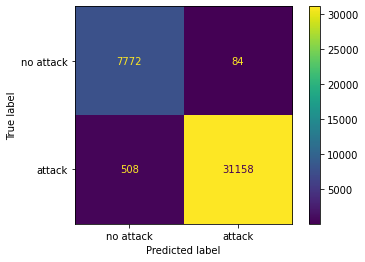

In [115]:
plot_confusion_matrix(kdd_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['no attack','attack'])

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = kdd_svm.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))


[[ 7772    84]
 [  508 31158]]


In [121]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.93865   0.98931   0.96331      7856
           1    0.99731   0.98396   0.99059     31666

    accuracy                        0.98502     39522
   macro avg    0.96798   0.98663   0.97695     39522
weighted avg    0.98565   0.98502   0.98517     39522



In [119]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 2, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      1.00      1.00         2

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



C:\Users\Carlo\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Carlo\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Carlo\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
